In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Importation des données - sous nutrition

In [2]:
sousNutrition = pd.read_csv(
    'Desktop/Openclassrooms/P4_Shibin_YANG/sous_nutrition.csv')

In [3]:
sousNutrition

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


In [4]:
sousNutrition.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

## Renommage des colonnes - Année & Valeur

In [5]:
sousNutrition = sousNutrition.rename(
    columns={'Année': 'Intervalle d\'année', 'Valeur': 'Nbr personne sous nutrition (millions)'})

In [6]:
sousNutrition

,Zone,Intervalle d'année,Nbr personne sous nutrition (millions)
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


## Transformtation de la colone - Nbr personne sous nutrition en type numérique

In [7]:
sousNutrition['Nbr personne sous nutrition (millions)'] = pd.to_numeric(
    sousNutrition['Nbr personne sous nutrition (millions)'], errors='coerce')

In [8]:
sousNutrition.dtypes

Zone                                       object
Intervalle d'année                         object
Nbr personne sous nutrition (millions)    float64
dtype: object

## Supression des tuples sans valeur

In [9]:
sousNutrition = sousNutrition.dropna(how='any')

In [10]:
sousNutrition

,Zone,Intervalle d'année,Nbr personne sous nutrition (millions)
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1195,Viet Nam,2013-2015,8.3
1196,Viet Nam,2014-2016,7.6
1197,Viet Nam,2015-2017,7.1
1198,Viet Nam,2016-2018,6.5


## Création de la dataframe - sous nutrition pour l'année 2017

In [11]:
sousNutrition2017 = sousNutrition[sousNutrition['Intervalle d\'année'] == '2016-2018']

In [12]:
sousNutrition2017

,Zone,Intervalle d'année,Nbr personne sous nutrition (millions)
4,Afghanistan,2016-2018,10.5
10,Afrique du Sud,2016-2018,3.1
16,Albanie,2016-2018,0.1
22,Algérie,2016-2018,1.3
40,Angola,2016-2018,5.8
...,...,...,...
1126,Togo,2016-2018,1.6
1156,Turkménistan,2016-2018,0.2
1174,Ukraine,2016-2018,1.5
1192,Venezuela (République bolivarienne du),2016-2018,8.0


# Importation des données - population

In [13]:
population = pd.read_csv(
    'Desktop/Openclassrooms/P4_Shibin_YANG/population.csv')

In [14]:
population

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


## Renommage de la colonne - Valeur

In [15]:
population = population.rename(
    columns={'Valeur': 'Nbr population (milliers)'})

In [16]:
population.dtypes

Zone                          object
Année                          int64
Nbr population (milliers)    float64
dtype: object

## Création de la dataframe - population pour l'année 2017

In [17]:
population2017 = population[population['Année'] == 2017]

In [18]:
population2017

,Zone,Année,Nbr population (milliers)
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402.484
1396,Viet Nam,2017,94600.648
1402,Yémen,2017,27834.819
1408,Zambie,2017,16853.599


# Calcul de la proportion de personnes souffrant de sous nutrition en 2017

## Jointure des deux dataframes - sous nutrition 2017 & population 2017

In [19]:
proportionSousNutrition2017 = pd.merge(sousNutrition2017, population2017,
                                       how='left', on='Zone')

In [20]:
proportionSousNutrition2017

,Zone,Intervalle d'année,Nbr personne sous nutrition (millions),Année,Nbr population (milliers)
0,Afghanistan,2016-2018,10.5,2017,36296.113
1,Afrique du Sud,2016-2018,3.1,2017,57009.756
2,Albanie,2016-2018,0.1,2017,2884.169
3,Algérie,2016-2018,1.3,2017,41389.189
4,Angola,2016-2018,5.8,2017,29816.766
...,...,...,...,...,...
79,Togo,2016-2018,1.6,2017,7698.474
80,Turkménistan,2016-2018,0.2,2017,5757.667
81,Ukraine,2016-2018,1.5,2017,44487.709
82,Venezuela (République bolivarienne du),2016-2018,8.0,2017,29402.484


## Calcul de la proportion de personne sous nutrition par pays

In [21]:
proportionSousNutrition2017['Proportion personne sous nutrition'] = proportionSousNutrition2017[
    'Nbr personne sous nutrition (millions)'] / proportionSousNutrition2017['Nbr population (milliers)']*1000

### Résultat

In [22]:
proportionSousNutrition2017.style.format({'Nbr personne sous nutrition (millions)': '{:.2f}',
                                         'Nbr population (milliers)': '{:.2f}', 'Proportion personne sous nutrition': '{:.2%}'})

,Zone,Intervalle d'année,Nbr personne sous nutrition (millions),Année,Nbr population (milliers),Proportion personne sous nutrition
0,Afghanistan,2016-2018,10.50,2017,36296.11,28.93%
1,Afrique du Sud,2016-2018,3.10,2017,57009.76,5.44%
2,Albanie,2016-2018,0.10,2017,2884.17,3.47%
3,Algérie,2016-2018,1.30,2017,41389.19,3.14%
4,Angola,2016-2018,5.80,2017,29816.77,19.45%
5,Arabie saoudite,2016-2018,1.60,2017,33101.18,4.83%
6,Argentine,2016-2018,1.50,2017,43937.14,3.41%
7,Bangladesh,2016-2018,21.50,2017,159685.42,13.46%
8,Bénin,2016-2018,0.80,2017,11175.20,7.16%
9,Bolivie (État plurinational de),2016-2018,1.70,2017,11192.85,15.19%


### Vérification du calcul

In [23]:
proportionSousNutrition2017['Proportion personne sous nutrition'].describe()

count    84.000000
mean      0.141265
std       0.111322
min       0.028159
25%       0.056605
50%       0.099995
75%       0.193149
max       0.482592
Name: Proportion personne sous nutrition, dtype: float64

## Calcul de la proportion de personne sous nutrition au niveau mondial

**En 2017, à peu près 7.1% de la population mondiale est en état de sous nutrition.**

In [24]:
nombrePersonneSousNutritionMondial2017 = '{:.2%}'.format(sousNutrition2017['Nbr personne sous nutrition (millions)'].sum(
)/population2017['Nbr population (milliers)'].sum()*1000)
print(nombrePersonneSousNutritionMondial2017)

7.10%


# Importation des données - disponibilité alimentaire

In [25]:
dispoAlimentaire = pd.read_csv(
    'Desktop/Openclassrooms/P4_Shibin_YANG/dispo_alimentaire.csv')

In [26]:
dispoAlimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [27]:
dispoAlimentaire.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

## Renommage des index - Zone

**J'ai remarqué que les noms de certains pays sont différents dans les deux fichiers - dispo_alimentaire & population, donc, afin d'éviter le fausse résultat, je les ai remplacés pour qu'ils soient identiques.**

In [28]:
dispoAlimentaire['Zone'] = dispoAlimentaire['Zone'].replace(
    {'Royaume-Uni': 'Royaume-Uni de Grande-Bretagne et d\'Irlande du Nord', 'Tchéquie (la)': 'Tchéquie'})

In [29]:
dispoAlimentaire

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


## Groupage des données et calcul du total disponibilité par zone

In [30]:
dispoAlimentaireZone = dispoAlimentaire.groupby('Zone').sum()

In [31]:
dispoAlimentaireZone

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0
Équateur,1200.0,1909.0,2346.0,544.91,94.64,61.30,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0
États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0


## Jointure des deux dataframes - diponibilité alimentaire 2017 & population 2017

In [32]:
dispoAlimentaireZone2017 = pd.merge(dispoAlimentaireZone, population2017,
                                    how='left', on='Zone')

In [33]:
dispoAlimentaireZone2017

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Nbr population (milliers)
0,Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0,2017,36296.113
1,Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0,2017,57009.756
2,Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0,2017,2884.169
3,Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0,2017,41389.189
4,Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0,2017,82658.409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0,2017,9487.203
170,Équateur,1200.0,1909.0,2346.0,544.91,94.64,61.30,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0,2017,16785.361
171,États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0,2017,325084.756
172,Éthiopie,685.0,3641.0,2129.0,354.55,25.89,60.39,44014.0,941.0,1711.0,33361.0,2256.0,46102.0,640.0,3443.0,-2857.0,2017,106399.924


In [34]:
dispoAlimentaireZone2017.dtypes

Zone                                                              object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                                           float64
Production                                                       float64
Semences                                           

In [35]:
dispoAlimentaireZone2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           174 non-null    object 
 1   Aliments pour animaux                                          174 non-null    float64
 2   Autres Utilisations                                            174 non-null    float64
 3   Disponibilité alimentaire (Kcal/personne/jour)                 174 non-null    float64
 4   Disponibilité alimentaire en quantité (kg/personne/an)         174 non-null    float64
 5   Disponibilité de matière grasse en quantité (g/personne/jour)  174 non-null    float64
 6   Disponibilité de protéines en quantité (g/personne/jour)       174 non-null    float64
 7   Disponibilité intérieure                                      

# Calcul du nombre théorique de personnes qui pourraient être nourries en 2017

## Calcul de la disponibilité alimentaire en calories par pays et par jour

In [36]:
dispoAlimentaireZone2017['Disponibilité alimentaire par zone(Kcal/pays/jour)'] = dispoAlimentaireZone2017[
    'Disponibilité alimentaire (Kcal/personne/jour)']*dispoAlimentaireZone2017['Nbr population (milliers)']*1000

In [37]:
dispoAlimentaireZone2017

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Nbr population (milliers),Disponibilité alimentaire par zone(Kcal/pays/jour)
0,Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0,2017,36296.113,7.574999e+10
1,Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0,2017,57009.756,1.721695e+11
2,Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0,2017,2884.169,9.194731e+09
3,Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0,2017,41389.189,1.362946e+11
4,Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0,2017,82658.409,2.895524e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0,2017,9487.203,3.107059e+10
170,Équateur,1200.0,1909.0,2346.0,544.91,94.64,61.30,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0,2017,16785.361,3.937846e+10
171,États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0,2017,325084.756,1.196962e+12
172,Éthiopie,685.0,3641.0,2129.0,354.55,25.89,60.39,44014.0,941.0,1711.0,33361.0,2256.0,46102.0,640.0,3443.0,-2857.0,2017,106399.924,2.265254e+11


## Nombre théorique de personnes qui pourraient être nourries en 2017

**Supporte qu'un homme a besoin de 2500 calories par jour**

In [38]:
nombreThéoriquePersonnesPourraientÊtreNourries2017 = dispoAlimentaireZone2017[
    'Disponibilité alimentaire par zone(Kcal/pays/jour)'].sum()/2500

### Résultat

**Théoriquement, à peu près 8,4 milliards personnes pourraient être nourries en 2017, soit environ 112% de la population mondiale pourraient être nourries.**

In [39]:
nombreThéoriquePersonnesPourraientÊtreNourries2017

8472865098.7704

In [40]:
proportionPersonnesPourraientÊtreNourries2017 = '{:.2%}'.format(
    nombreThéoriquePersonnesPourraientÊtreNourries2017/(population2017['Nbr population (milliers)'].sum()*1000))
print(proportionPersonnesPourraientÊtreNourries2017)

112.25%


# Calcul du nombre théorique de personnes qui pourraient être nourries par des produits végétaux en 2017

## Création de la dataframe - disponibilité végétaux pour l'année 2017

In [41]:
dispoVégétaux = dispoAlimentaire[dispoAlimentaire['Origine'] == 'vegetale']

In [42]:
dispoVégétaux.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN


## Groupage des données et calcul du total disponibilité alimentaire végétale par zone

In [43]:
dispoVégétauxZone = dispoVégétaux.groupby('Zone').sum()

In [44]:
dispoVégétauxZone

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Afghanistan,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0
Afrique du Sud,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0
Albanie,559.0,172.0,2203.0,706.49,38.76,51.96,3326.0,84.0,846.0,2241.0,182.0,2609.0,55.0,113.0,-45.0
Algérie,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0
Allemagne,28122.0,6842.0,2461.0,568.82,63.63,39.90,126866.0,34454.0,50642.0,47079.0,3717.0,110926.0,1475.0,39686.0,-247.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2619.0,2718.0,473.18,53.00,62.81,9623.0,3326.0,12546.0,4426.0,675.0,780.0,0.0,804.0,-376.0
Équateur,1001.0,1905.0,1732.0,327.21,49.48,24.80,14926.0,7142.0,1475.0,5149.0,654.0,20042.0,125.0,6200.0,555.0
États-Unis d'Amérique,145289.0,145102.0,2698.0,590.68,93.68,39.65,632023.0,140442.0,69522.0,189122.0,6937.0,740194.0,9030.0,140986.0,-37242.0


## Jointure des deux dataframes - disponibilité alimentaire végétale 2017 & population 2017

In [45]:
dispoVégétauxZone2017 = pd.merge(dispoVégétauxZone, population2017,
                                    how='left', on='Zone')

In [46]:
dispoVégétauxZone2017

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Nbr population (milliers)
0,Afghanistan,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0,2017,36296.113
1,Afrique du Sud,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0,2017,57009.756
2,Albanie,559.0,172.0,2203.0,706.49,38.76,51.96,3326.0,84.0,846.0,2241.0,182.0,2609.0,55.0,113.0,-45.0,2017,2884.169
3,Algérie,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0,2017,41389.189
4,Allemagne,28122.0,6842.0,2461.0,568.82,63.63,39.90,126866.0,34454.0,50642.0,47079.0,3717.0,110926.0,1475.0,39686.0,-247.0,2017,82658.409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1174.0,2619.0,2718.0,473.18,53.00,62.81,9623.0,3326.0,12546.0,4426.0,675.0,780.0,0.0,804.0,-376.0,2017,9487.203
170,Équateur,1001.0,1905.0,1732.0,327.21,49.48,24.80,14926.0,7142.0,1475.0,5149.0,654.0,20042.0,125.0,6200.0,555.0,2017,16785.361
171,États-Unis d'Amérique,145289.0,145102.0,2698.0,590.68,93.68,39.65,632023.0,140442.0,69522.0,189122.0,6937.0,740194.0,9030.0,140986.0,-37242.0,2017,325084.756
172,Éthiopie,667.0,3641.0,2005.0,300.99,17.88,52.70,38824.0,918.0,1694.0,28320.0,2125.0,40907.0,635.0,3443.0,-2857.0,2017,106399.924


In [47]:
dispoVégétauxZone2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           174 non-null    object 
 1   Aliments pour animaux                                          174 non-null    float64
 2   Autres Utilisations                                            174 non-null    float64
 3   Disponibilité alimentaire (Kcal/personne/jour)                 174 non-null    float64
 4   Disponibilité alimentaire en quantité (kg/personne/an)         174 non-null    float64
 5   Disponibilité de matière grasse en quantité (g/personne/jour)  174 non-null    float64
 6   Disponibilité de protéines en quantité (g/personne/jour)       174 non-null    float64
 7   Disponibilité intérieure                                      

## Calcul de la disponibilité alimentaire végétale en calories par pays et par jour

In [48]:
dispoVégétauxZone2017['Disponibilité alimentaire par zone(Kcal/pays/jour)'] = dispoVégétauxZone2017[
    'Disponibilité alimentaire (Kcal/personne/jour)']*dispoVégétauxZone2017['Nbr population (milliers)']*1000

In [49]:
dispoVégétauxZone2017

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Nbr population (milliers),Disponibilité alimentaire par zone(Kcal/pays/jour)
0,Afghanistan,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0,2017,36296.113,6.791003e+10
1,Afrique du Sud,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0,2017,57009.756,1.444057e+11
2,Albanie,559.0,172.0,2203.0,706.49,38.76,51.96,3326.0,84.0,846.0,2241.0,182.0,2609.0,55.0,113.0,-45.0,2017,2884.169,6.353824e+09
3,Algérie,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0,2017,41389.189,1.206495e+11
4,Allemagne,28122.0,6842.0,2461.0,568.82,63.63,39.90,126866.0,34454.0,50642.0,47079.0,3717.0,110926.0,1475.0,39686.0,-247.0,2017,82658.409,2.034223e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Émirats arabes unis,1174.0,2619.0,2718.0,473.18,53.00,62.81,9623.0,3326.0,12546.0,4426.0,675.0,780.0,0.0,804.0,-376.0,2017,9487.203,2.578622e+10
170,Équateur,1001.0,1905.0,1732.0,327.21,49.48,24.80,14926.0,7142.0,1475.0,5149.0,654.0,20042.0,125.0,6200.0,555.0,2017,16785.361,2.907225e+10
171,États-Unis d'Amérique,145289.0,145102.0,2698.0,590.68,93.68,39.65,632023.0,140442.0,69522.0,189122.0,6937.0,740194.0,9030.0,140986.0,-37242.0,2017,325084.756,8.770787e+11
172,Éthiopie,667.0,3641.0,2005.0,300.99,17.88,52.70,38824.0,918.0,1694.0,28320.0,2125.0,40907.0,635.0,3443.0,-2857.0,2017,106399.924,2.133318e+11


## Nombre théorique de personnes qui pourraient être nourries par produits végétaux en 2017

**Supporte qu'un homme a besoin de 2500 calories par jour**

In [50]:
nombreThéoriquePersonnesPourraientÊtreNourriesParVégétaux2017 = dispoVégétauxZone2017[
    'Disponibilité alimentaire par zone(Kcal/pays/jour)'].sum()/2500

### Résultat

**Théoriquement, à peu près 7 milliards personnes pourraient être nourries en 2017, soit environ 92.47% de la population mondiale pourraient être nourries.**

In [51]:
nombreThéoriquePersonnesPourraientÊtreNourriesParVégétaux2017

6979803767.5744

In [52]:
proportionPersonnesPourraientÊtreNourriesParVégétaux2017 = '{:.2%}'.format(
    nombreThéoriquePersonnesPourraientÊtreNourriesParVégétaux2017/(population2017['Nbr population (milliers)'].sum()*1000))
print(proportionPersonnesPourraientÊtreNourriesParVégétaux2017)

92.47%


# Calcul de l'utilisation de la disponibilité alimentaire intérieure

## Calcul de la somme totale alimentaire par élément

In [53]:
dispoAlimentaire.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [54]:
dispoAlimentaire.sum()

Zone                                                             AfghanistanAfghanistanAfghanistanAfghanistanAf...
Produit                                                          Abats ComestibleAgrumes, AutresAliments pour e...
Origine                                                          animalevegetalevegetalevegetalevegetaleanimale...
Aliments pour animaux                                                                                    1304245.0
Autres Utilisations                                                                                       865023.0
Disponibilité alimentaire (Kcal/personne/jour)                                                            495442.0
Disponibilité alimentaire en quantité (kg/personne/an)                                                   122201.94
Disponibilité de matière grasse en quantité (g/personne/jour)                                             15133.01
Disponibilité de protéines en quantité (g/personne/jour)                        

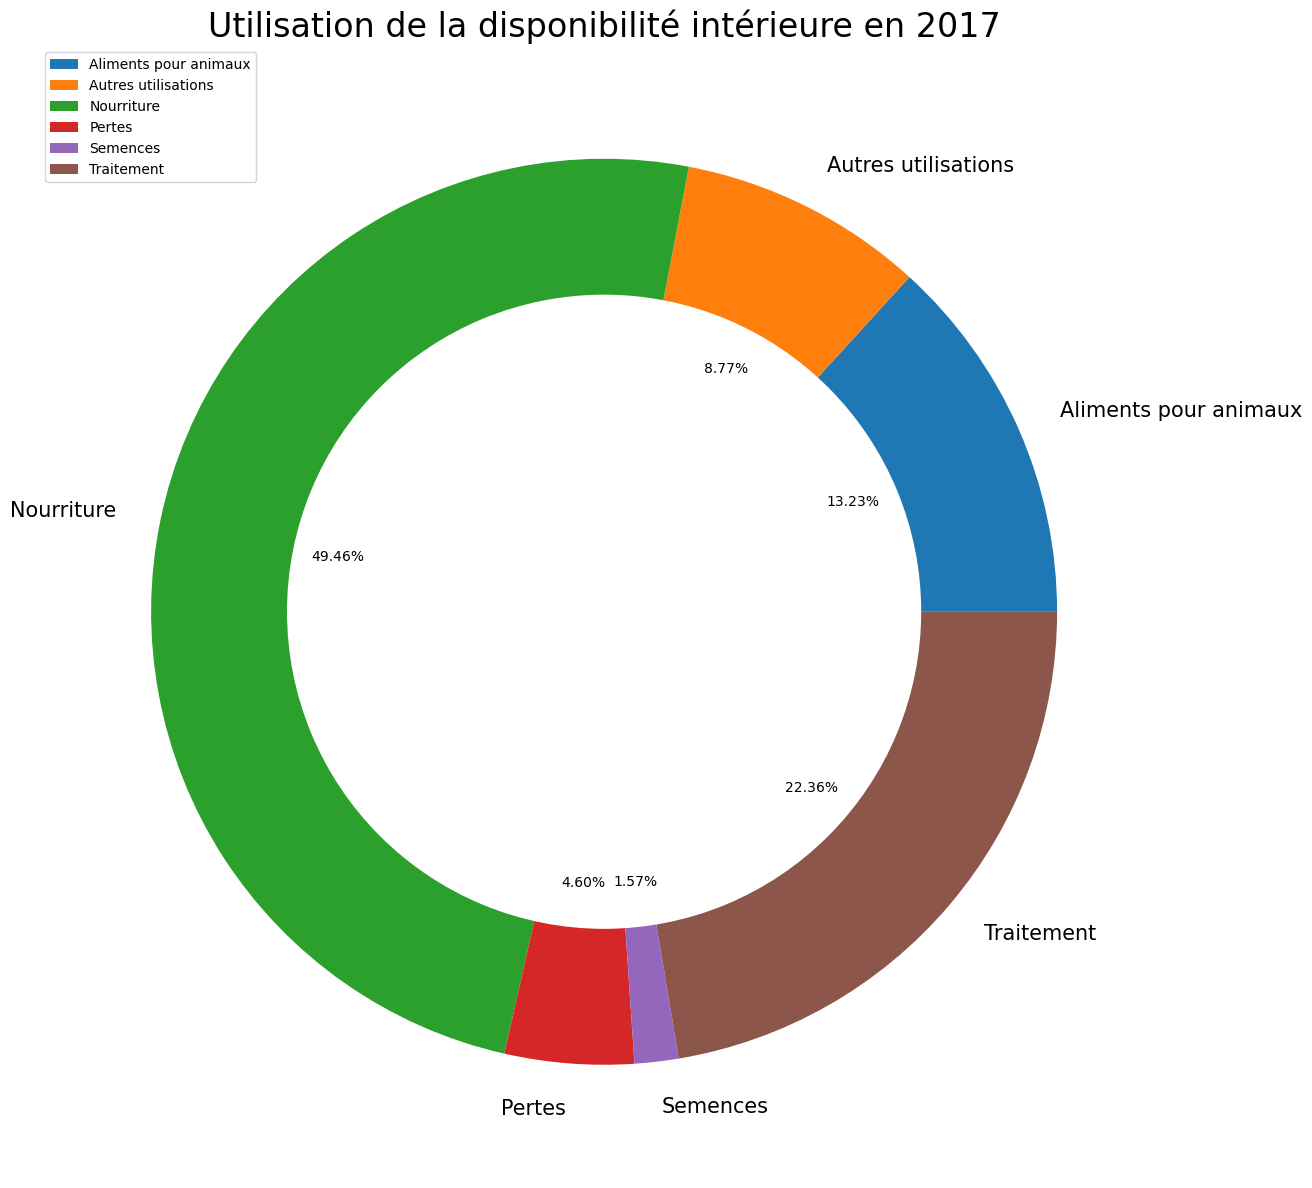

In [55]:
plt.figure(figsize=(15, 15), dpi=100)
plt.rcParams.update({'font.size': 20})
UtilisationDispo = [1304245, 865023, 4876258, 453698, 154681, 2204687]
Élément = ['Aliments pour animaux', 'Autres utilisations',
           'Nourriture', 'Pertes', 'Semences', 'Traitement']
pie = plt.pie(UtilisationDispo, labels=Élément, autopct='%2.2f%%')
plt.pie([1], radius=0.7, colors='w')
plt.title('Utilisation de la disponibilité intérieure en 2017')
plt.legend(loc='upper left', fontsize=10)
for font in pie[1]:
    font.set_size(15)
for digit in pie[2]:
    digit.set_size(10)
plt.show()

## Utilisation de la disponibilité alimentaire intérieure pour animaux

**En 2017, enriron 13.24% disponibilité alimentaire sont utilisé pour animaux.**

In [56]:
proportionUtilisationDispoIntérieureAnimaux2017 = '{:.2%}'.format(
    dispoAlimentaire['Aliments pour animaux'].sum()/dispoAlimentaire['Disponibilité intérieure'].sum())

In [57]:
print(proportionUtilisationDispoIntérieureAnimaux2017)

13.24%


## Utilisation de la disponibilité alimentaire intérieure pour humaines

**En 2017, enriron 49.51% disponibilité alimentaire sont utilisé pour humaines.**

In [58]:
proportionUtilisationDispoIntérieureHumaine2017 = '{:.2%}'.format(
    dispoAlimentaire['Nourriture'].sum()/dispoAlimentaire['Disponibilité intérieure'].sum())

In [59]:
print(proportionUtilisationDispoIntérieureHumaine2017)

49.51%


## Pertes de la disponibilité alimentaire intérieure

**En 2017, on perd enriron 4.61% de disponibilité alimentaire.**

In [60]:
proportionDispoIntérieurePertes2017 = '{:.2%}'.format(
    dispoAlimentaire['Pertes'].sum()/dispoAlimentaire['Disponibilité intérieure'].sum())

In [61]:
print(proportionDispoIntérieurePertes2017)

4.61%


# Calcul de l'utilisation de manioc en Thaïlande en 2017

## Vérification de l'état de sous nutrition en Thaïlande en 2017 

**En 2017, il y a environ 8.96% de population en Thaïlande est en état de sous nutrition en 2017.**

In [62]:
proportionSousNutritionThaïlande2017 = proportionSousNutrition2017[
    proportionSousNutrition2017['Zone'] == 'Thaïlande']

In [63]:
proportionSousNutritionThaïlande2017

,Zone,Intervalle d'année,Nbr personne sous nutrition (millions),Année,Nbr population (milliers),Proportion personne sous nutrition
77,Thaïlande,2016-2018,6.2,2017,69209.81,0.089583


In [64]:
proportionSousNutritionThaïlande2017.style.format({'Nbr personne sous nutrition (millions)': '{:.2f}',
                                                   'Nbr population (milliers)': '{:.2f}', 'Proportion personne sous nutrition': '{:.2%}'})

,Zone,Intervalle d'année,Nbr personne sous nutrition (millions),Année,Nbr population (milliers),Proportion personne sous nutrition
77,Thaïlande,2016-2018,6.20,2017,69209.81,8.96%


## Vérification de l'utilisation de manioc en Thaïlande en 2017

In [65]:
dispoThaïlande2017 = dispoAlimentaire.query(
    'Zone == "Thaïlande" & Produit == "Manioc"')

In [66]:
dispoThaïlande2017

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


**On peut observer que la Thaïlande a exporté beaucoup de manioc par rapport à sa production en 2017, soit environ 83% de la production.**

In [67]:
proportionExportationsManiocThaïlandeParRapportProduction2017 = dispoThaïlande2017[
    'Exportations - Quantité']/dispoThaïlande2017['Production']

In [68]:
proportionExportationsManiocThaïlandeParRapportProduction2017.map(lambda n: '{:,.2%}'.format(n))

13809    83.41%
dtype: object

# Importation des données - disponibilité alimentaire céréale en 2017

In [69]:
dispoCéréale2017 = pd.read_csv(
    'Desktop/Openclassrooms/P4_Shibin_YANG/dispo_céréale.csv')

In [70]:
dispoCéréale2017

,Domaine,Zone,Élément,Produit,Année,Valeur
0,Nouveaux Bilans Alimentaire,Afghanistan,Production,Blé et produits,2017,4281.00
1,Nouveaux Bilans Alimentaire,Afghanistan,Importations - Quantité,Blé et produits,2017,3080.00
2,Nouveaux Bilans Alimentaire,Afghanistan,Variation de stock,Blé et produits,2017,32.00
3,Nouveaux Bilans Alimentaire,Afghanistan,Exportations - Quantité,Blé et produits,2017,2.00
4,Nouveaux Bilans Alimentaire,Afghanistan,Disponibilité intérieure,Blé et produits,2017,7326.00
...,...,...,...,...,...,...
19513,Nouveaux Bilans Alimentaire,Zimbabwe,Nourriture,"Céréales, Autres",2017,3.00
19514,Nouveaux Bilans Alimentaire,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,"Céréales, Autres",2017,0.20
19515,Nouveaux Bilans Alimentaire,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),"Céréales, Autres",2017,2.00
19516,Nouveaux Bilans Alimentaire,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,"Céréales, Autres",2017,0.05


## Suppression des colones inutiles

In [71]:
dispoCéréale2017.drop(columns=['Domaine', 'Année'], inplace=True)

In [72]:
dispoCéréale2017

,Zone,Élément,Produit,Valeur
0,Afghanistan,Production,Blé et produits,4281.00
1,Afghanistan,Importations - Quantité,Blé et produits,3080.00
2,Afghanistan,Variation de stock,Blé et produits,32.00
3,Afghanistan,Exportations - Quantité,Blé et produits,2.00
4,Afghanistan,Disponibilité intérieure,Blé et produits,7326.00
...,...,...,...,...
19513,Zimbabwe,Nourriture,"Céréales, Autres",3.00
19514,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,"Céréales, Autres",0.20
19515,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),"Céréales, Autres",2.00
19516,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,"Céréales, Autres",0.05


## Réorganisation de la dataframe

In [73]:
dispoCéréale2017 = dispoCéréale2017.pivot_table(
    columns='Élément', index=['Zone', 'Produit'], values='Valeur')

In [74]:
dispoCéréale2017

Élément                          Alimentation pour touristes  \
Zone         Produit                                           
Afghanistan  Avoine                                      NaN   
             Blé et produits                             NaN   
             Céréales, Autres                            NaN   
             Maïs et produits                            NaN   
             Millet et produits                          NaN   
...                                                      ...   
Îles Salomon Maïs et produits                            0.0   
             Millet et produits                          NaN   
             Orge et produits                            0.0   
             Riz et produits                            10.0   
             Sorgho et produits                          NaN   

Élément                          Aliments pour animaux  \
Zone         Produit                                     
Afghanistan  Avoine                                0.0   
             Blé et produits                     491.0   
             Céréales, Autres                      0.0   
             Maïs et produits                    111.0   
             Millet et produits                    0.0   
...                                                ...   
Îles Salomon Maïs et produits                      NaN   
             Millet et produits                    0.0   
             Orge et produits                      NaN   
             Riz et produits                       7.0   
             Sorgho et produits                    0.0   

Élément                          Autres utilisations (non alimentaire)  \
Zone         Produit                                                     
Afghanistan  Avoine                                                NaN   
             Blé et produits                                       NaN   
             Céréales, Autres                                      NaN   
             Maïs et produits                                      NaN   
             Millet et produits                                    NaN   
...                                                                ...   
Îles Salomon Maïs et produits                                      NaN   
             Millet et produits                                    NaN   
             Orge et produits                                      NaN   
             Riz et produits                                       0.0   
             Sorgho et produits                                    NaN   

Élément                          Disponibilité alimentaire (Kcal/personne/jour)  \
Zone         Produit                                                              
Afghanistan  Avoine                                                         0.0   
             Blé et produits                                             1358.0   
             Céréales, Autres                                               0.0   
             Maïs et produits                                              11.0   
             Millet et produits                                             3.0   
...                                                                         ...   
Îles Salomon Maïs et produits                                               1.0   
             Millet et produits                                             NaN   
             Orge et produits                                               0.0   
             Riz et produits                                              605.0   
             Sorgho et produits                                             NaN   

Élément                          Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone         Produit                                                                      
Afghanistan  Avoine                                                           0.00        
             Blé et produits                                                158.38        
     

## Suppression à nouveau des colones inutiles

In [75]:
dispoCéréale2017.drop(columns=['Alimentation pour touristes', 'Résidus'], inplace=True)

In [76]:
dispoCéréale2017

Élément                          Aliments pour animaux  \
Zone         Produit                                     
Afghanistan  Avoine                                0.0   
             Blé et produits                     491.0   
             Céréales, Autres                      0.0   
             Maïs et produits                    111.0   
             Millet et produits                    0.0   
...                                                ...   
Îles Salomon Maïs et produits                      NaN   
             Millet et produits                    0.0   
             Orge et produits                      NaN   
             Riz et produits                       7.0   
             Sorgho et produits                    0.0   

Élément                          Autres utilisations (non alimentaire)  \
Zone         Produit                                                     
Afghanistan  Avoine                                                NaN   
             Blé et produits                                       NaN   
             Céréales, Autres                                      NaN   
             Maïs et produits                                      NaN   
             Millet et produits                                    NaN   
...                                                                ...   
Îles Salomon Maïs et produits                                      NaN   
             Millet et produits                                    NaN   
             Orge et produits                                      NaN   
             Riz et produits                                       0.0   
             Sorgho et produits                                    NaN   

Élément                          Disponibilité alimentaire (Kcal/personne/jour)  \
Zone         Produit                                                              
Afghanistan  Avoine                                                         0.0   
             Blé et produits                                             1358.0   
             Céréales, Autres                                               0.0   
             Maïs et produits                                              11.0   
             Millet et produits                                             3.0   
...                                                                         ...   
Îles Salomon Maïs et produits                                               1.0   
             Millet et produits                                             NaN   
             Orge et produits                                               0.0   
             Riz et produits                                              605.0   
             Sorgho et produits                                             NaN   

Élément                          Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone         Produit                                                                      
Afghanistan  Avoine                                                           0.00        
             Blé et produits                                                158.38        
             Céréales, Autres                                                 0.00        
             Maïs et produits                                                 1.34        
             Millet et produits                                               0.32        
...                                                                            ...        
Îles Salomon Maïs et produits                                                 0.13        
             Millet et produits                                                NaN        
             Orge et produits                                                 0.02        
             Riz et produits                                                 92.75        
             Sorgho et produits                                                NaN        

Élément           

In [77]:
dispoCéréale2017.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1535 entries, ('Afghanistan', 'Avoine') to ('Îles Salomon', 'Sorgho et produits')
Data columns (total 15 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Aliments pour animaux                                          1296 non-null   float64
 1   Autres utilisations (non alimentaire)                          515 non-null    float64
 2   Disponibilité alimentaire (Kcal/personne/jour)                 1308 non-null   float64
 3   Disponibilité alimentaire en quantité (kg/personne/an)         1315 non-null   float64
 4   Disponibilité de matière grasse en quantité (g/personne/jour)  1312 non-null   float64
 5   Disponibilité de protéines en quantité (g/personne/jour)       1308 non-null   float64
 6   Disponibilité intérieure                                       1535 non-null   float64
 7   Ex

# Calcul de l'utilisation de la disponibilité céréale en 2017

## Calcul de la somme totale céréale par élément

In [78]:
dispoCéréale2017.sum()

Élément
Aliments pour animaux                                            1178491.00
Autres utilisations (non alimentaire)                             344001.00
Disponibilité alimentaire (Kcal/personne/jour)                    198277.00
Disponibilité alimentaire en quantité (kg/personne/an)             25541.03
Disponibilité de matière grasse en quantité (g/personne/jour)       1093.32
Disponibilité de protéines en quantité (g/personne/jour)            5124.60
Disponibilité intérieure                                         3468334.00
Exportations - Quantité                                           546076.00
Importations - Quantité                                           551186.00
Nourriture                                                       1567798.00
Pertes                                                            171114.00
Production                                                       3602724.00
Semences                                                           94410.00
Trai

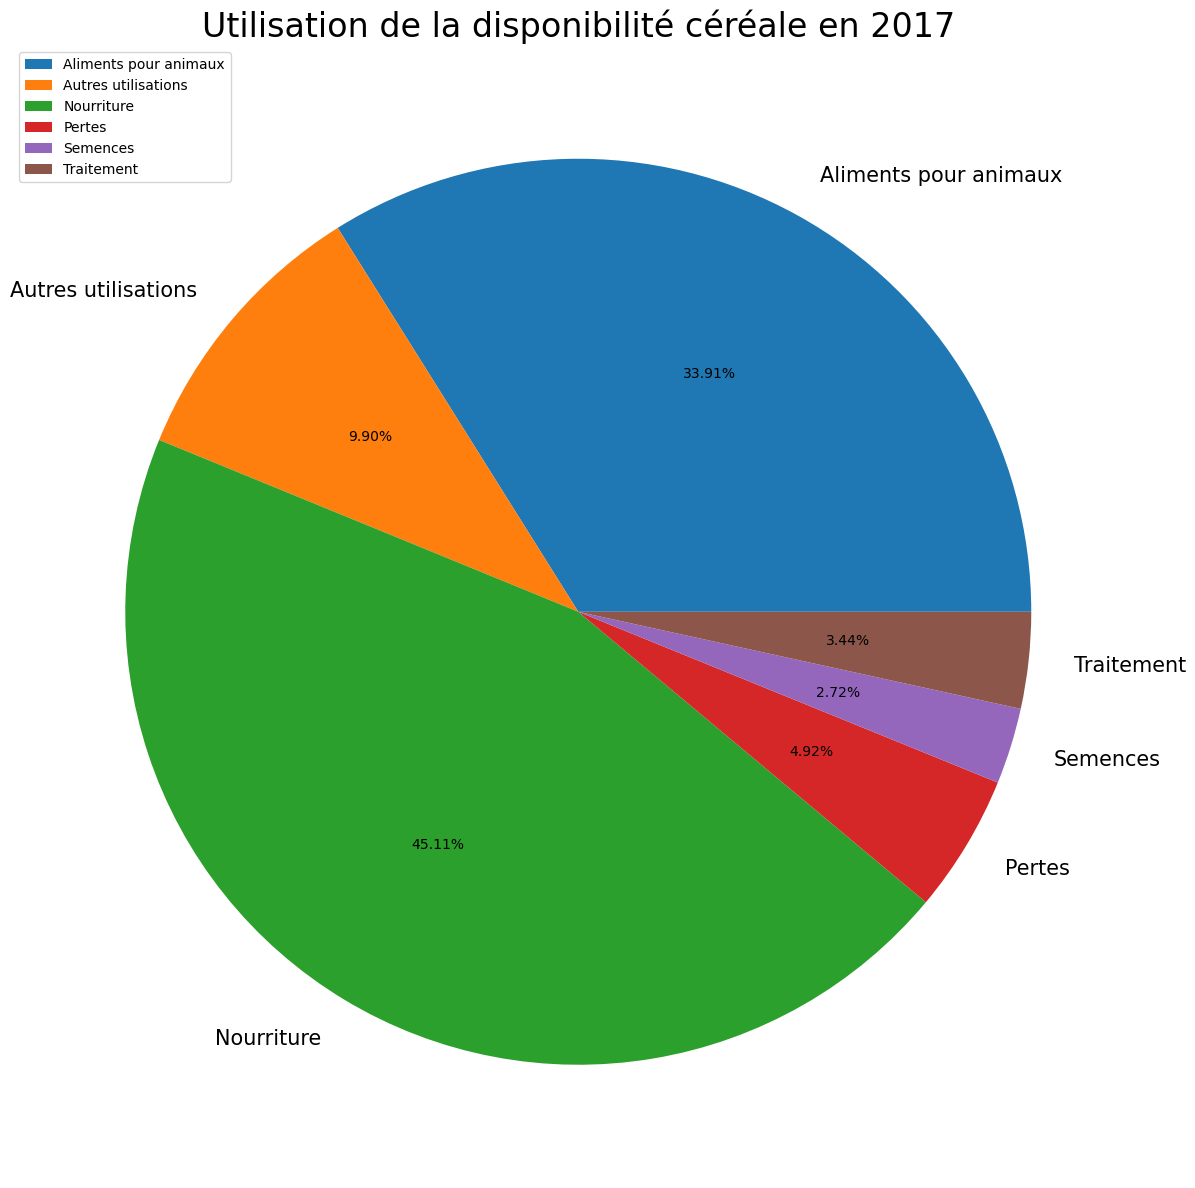

In [79]:
plt.figure(figsize=(15, 15), dpi=100)
UtilisationCéréale = [1178491, 344001, 1567798, 171114, 94410, 119482]
Élément = ['Aliments pour animaux', 'Autres utilisations',
           'Nourriture', 'Pertes', 'Semences', 'Traitement']
pie = plt.pie(UtilisationCéréale, labels=Élément, autopct='%2.2f%%')
plt.title('Utilisation de la disponibilité céréale en 2017')
plt.legend(loc='upper left', fontsize=10)
for font in pie[1]:
    font.set_size(15)
for digit in pie[2]:
    digit.set_size(10)
plt.show()

## Proportion d'utilisation de céréales pour animaux

**En 2017, enriron 34% disponibilité céréale sont utilisé pour animaux.**

In [80]:
proportionUtilisationCéréalesAnimaux2017 = '{:.2%}'.format(
    dispoCéréale2017['Aliments pour animaux'].sum()/dispoCéréale2017['Disponibilité intérieure'].sum())

In [81]:
print(proportionUtilisationCéréalesAnimaux2017)

33.98%


## Proportion d'utilisation de céréales pour humaines

**En 2017, enriron 45.2% disponibilité céréale sont utilisé pour humaines.**

In [82]:
proportionUtilisationCéréalesHumaine2017 = '{:.2%}'.format(
    dispoCéréale2017['Nourriture'].sum()/dispoCéréale2017['Disponibilité intérieure'].sum())

In [83]:
print(proportionUtilisationCéréalesHumaine2017)

45.20%


# Top 10 pays ayant plus de personne en état de sous nutrition en 2017

In [84]:
top10PaysSousNutrition2017 = proportionSousNutrition2017.nlargest(
    10, 'Proportion personne sous nutrition')

In [85]:
top10PaysSousNutrition2017.style.format({'Nbr personne sous nutrition (millions)': '{:.2f}',
                                         'Nbr population (milliers)': '{:.2f}', 'Proportion personne sous nutrition': '{:.2%}'})

,Zone,Intervalle d'année,Nbr personne sous nutrition (millions),Année,Nbr population (milliers),Proportion personne sous nutrition
32,Haïti,2016-2018,5.30,2017,10982.37,48.26%
67,République populaire démocratique de Corée,2016-2018,12.00,2017,25429.83,47.19%
45,Madagascar,2016-2018,10.50,2017,25570.51,41.06%
44,Libéria,2016-2018,1.80,2017,4702.23,38.28%
42,Lesotho,2016-2018,0.80,2017,2091.53,38.25%
76,Tchad,2016-2018,5.70,2017,15016.75,37.96%
69,Rwanda,2016-2018,4.20,2017,11980.96,35.06%
53,Mozambique,2016-2018,9.40,2017,28649.02,32.81%
78,Timor-Leste,2016-2018,0.40,2017,1243.26,32.17%
0,Afghanistan,2016-2018,10.50,2017,36296.11,28.93%


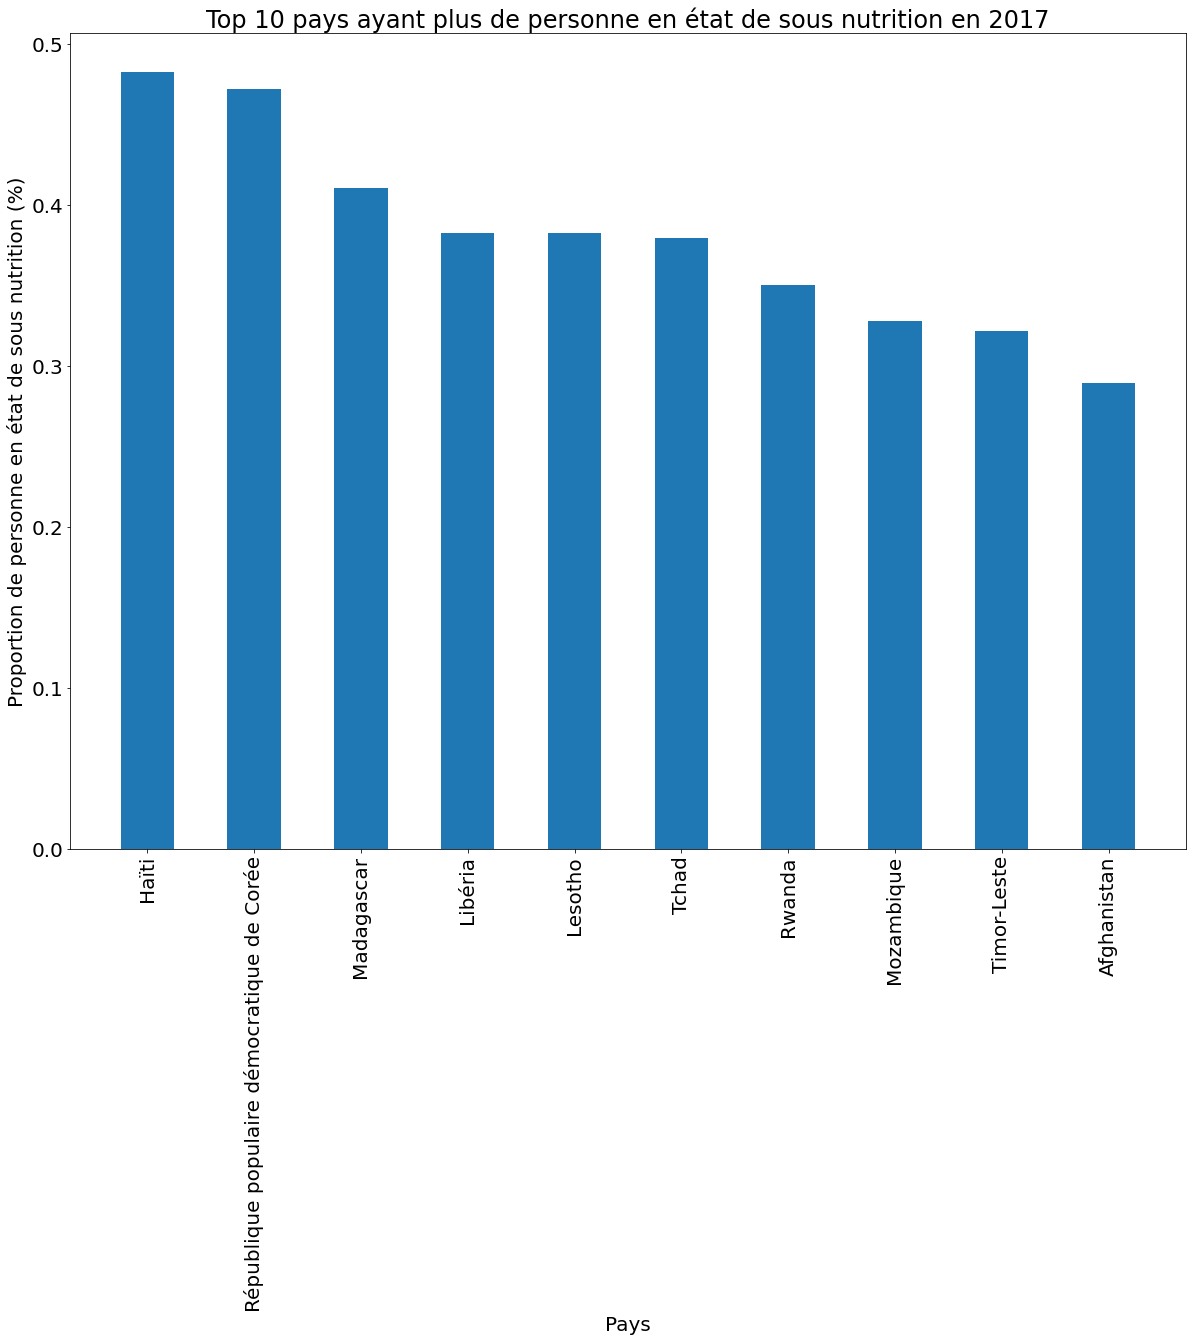

In [86]:
plt.figure(figsize=(20, 15))
plt.xticks(rotation=90)
Pays = top10PaysSousNutrition2017['Zone']
SousNutrition = top10PaysSousNutrition2017[
    'Proportion personne sous nutrition']
plt.bar(Pays, SousNutrition, width=0.5)
plt.xlabel('Pays')
plt.ylabel('Proportion de personne en état de sous nutrition (%)')
plt.title('Top 10 pays ayant plus de personne en état de sous nutrition en 2017')
plt.show()

# La disponibilité par habitant par jour en calorie 2017

In [87]:
dispoParHabitant2017 = dispoAlimentaireZone2017[[
    'Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']]

In [88]:
dispoParHabitant2017

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0
...,...,...
169,Émirats arabes unis,3275.0
170,Équateur,2346.0
171,États-Unis d'Amérique,3682.0
172,Éthiopie,2129.0


## Top 10 pays ayant le plus de disponibilité par habitant en 2017

In [89]:
top10PaysPlusDispoParHabitant2017 = dispoParHabitant2017.nlargest(
    10, 'Disponibilité alimentaire (Kcal/personne/jour)')

In [90]:
top10PaysPlusDispoParHabitant2017

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
168,Égypte,3518.0
4,Allemagne,3503.0


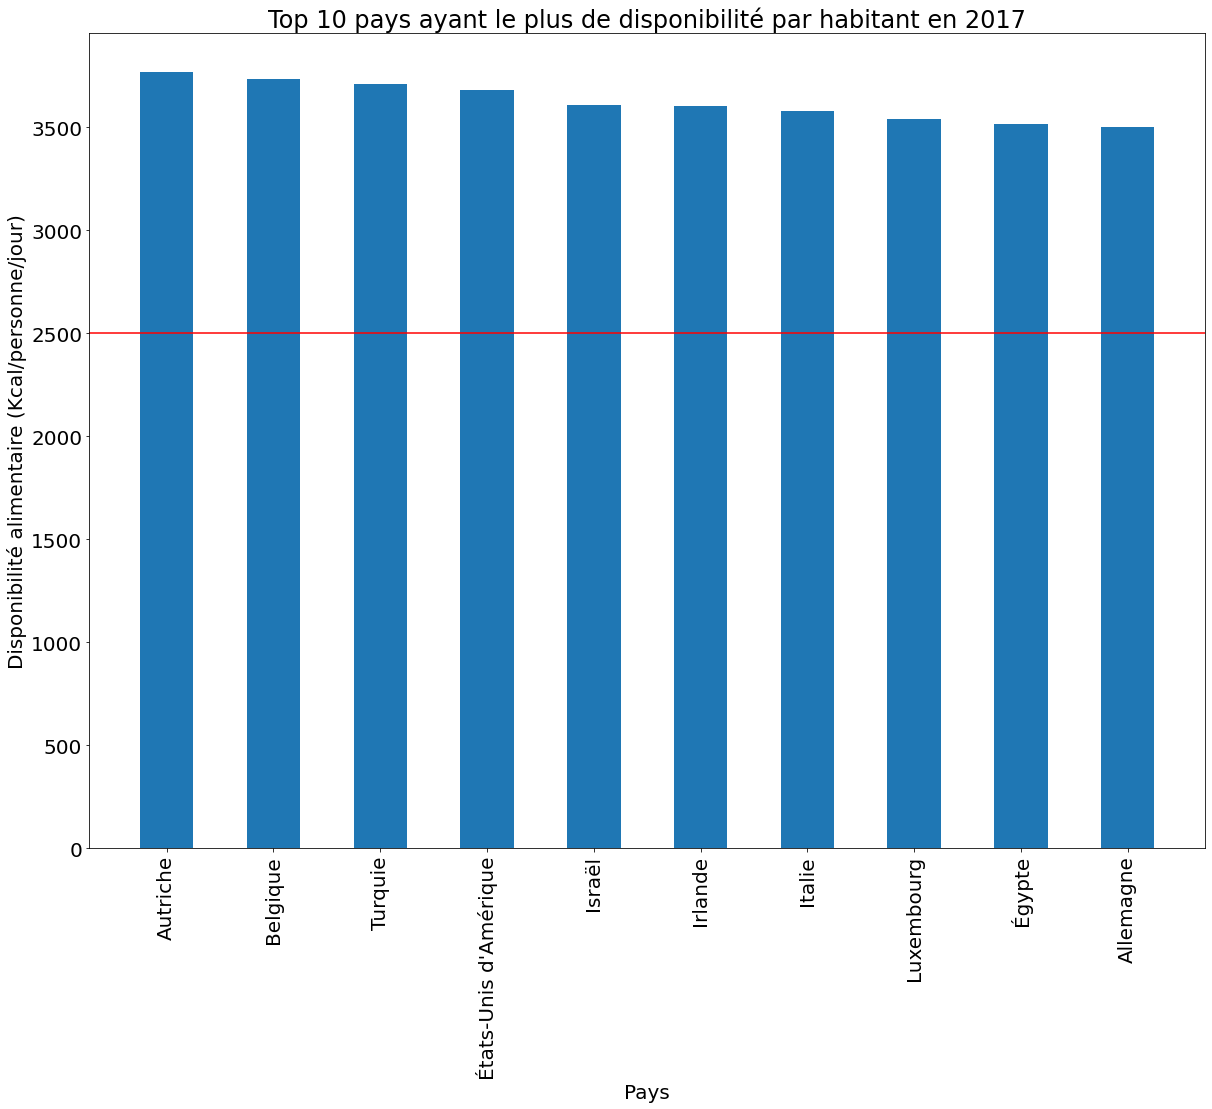

In [91]:
plt.figure(figsize=(20, 15))
plt.rcParams['axes.titlesize'] = 24
plt.xticks(rotation=90)
Pays = top10PaysPlusDispoParHabitant2017['Zone']
Dispo = top10PaysPlusDispoParHabitant2017[
    'Disponibilité alimentaire (Kcal/personne/jour)']
plt.bar(Pays, Dispo, width=0.5)
plt.axhline(y=2500, color='r', linestyle='-')
plt.xlabel('Pays')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.title('Top 10 pays ayant le plus de disponibilité par habitant en 2017')
plt.show()

## Top 10 pays ayant le moins de disponibilité par habitant  en 2017

In [92]:
top10PaysMoinsDispoParHabitant2017 = dispoParHabitant2017.nsmallest(
    10, 'Disponibilité alimentaire (Kcal/personne/jour)')

In [93]:
top10PaysMoinsDispoParHabitant2017

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
133,République populaire démocratique de Corée,2093.0
151,Tchad,2109.0
167,Zimbabwe,2113.0
114,Ouganda,2126.0
154,Timor-Leste,2129.0


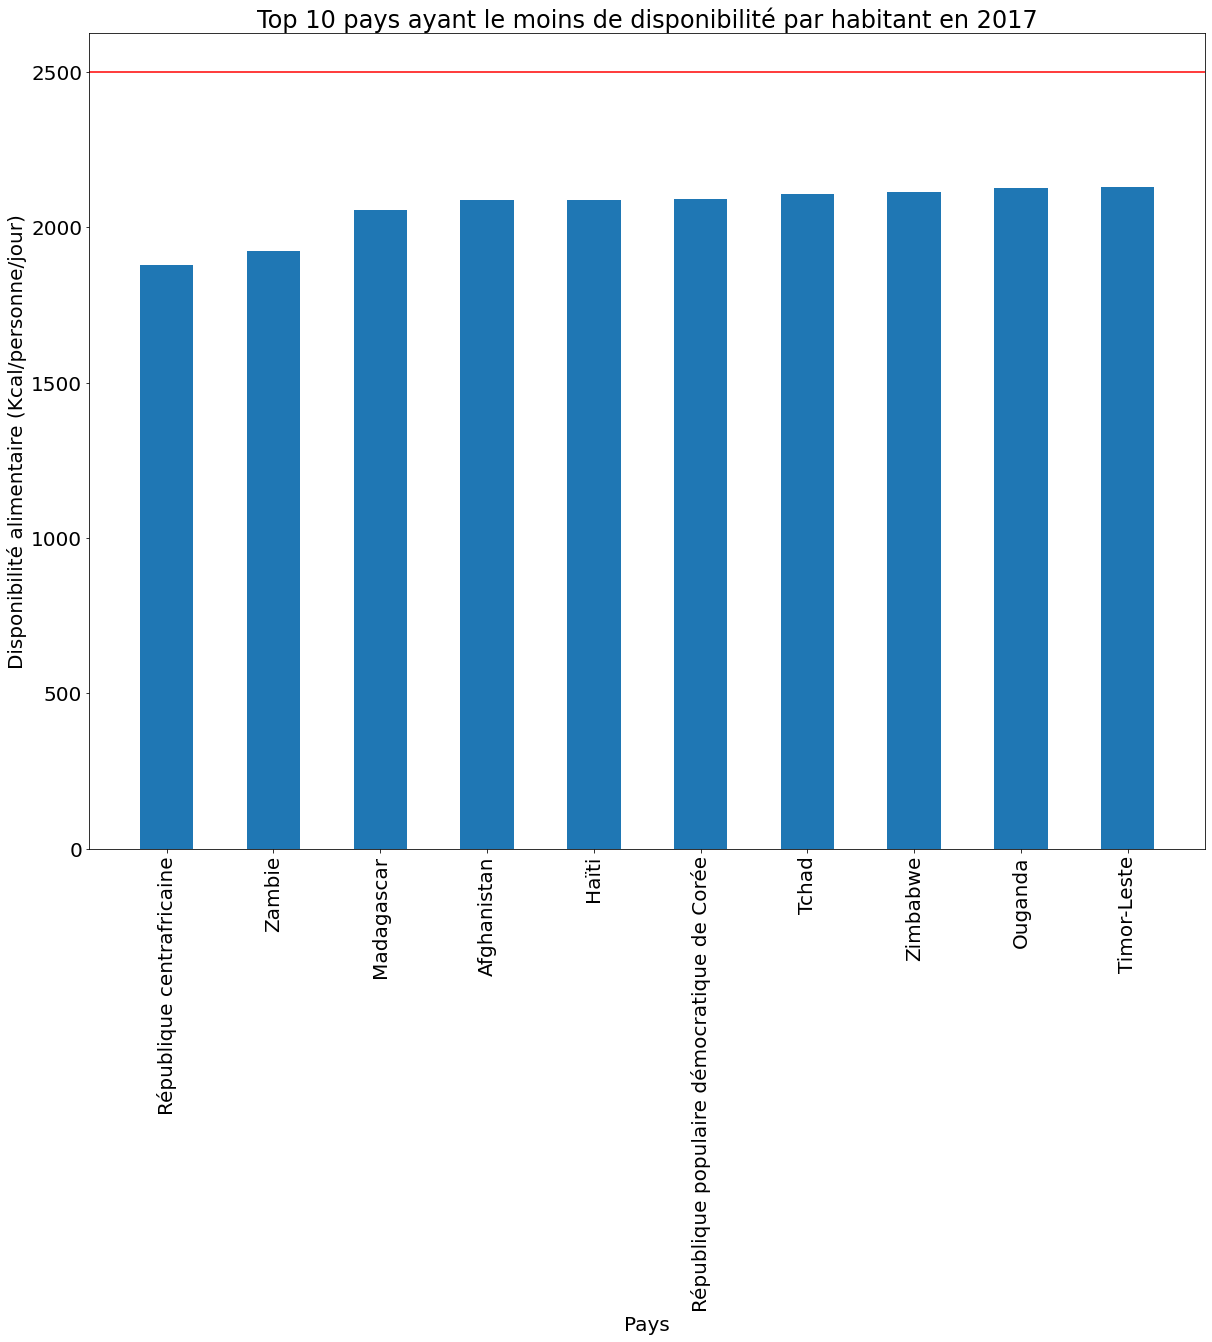

In [94]:
plt.figure(figsize=(20, 15))
plt.rcParams['axes.titlesize'] = 24
plt.xticks(rotation=90)
Pays = top10PaysMoinsDispoParHabitant2017['Zone']
Dispo = top10PaysMoinsDispoParHabitant2017[
    'Disponibilité alimentaire (Kcal/personne/jour)']
plt.bar(Pays, Dispo, width=0.5)
plt.axhline(y=2500, color='r', linestyle='-')
plt.xlabel('Pays')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.title('Top 10 pays ayant le moins de disponibilité par habitant en 2017')
plt.show()

# Calcul de l'efficacité de l'aide alimentaire depuis 2013

## Importation des données - aide alimentaire

In [95]:
aideAlimentaire2017 = pd.read_csv(
    'Desktop/Openclassrooms/P4_Shibin_YANG/aide_alimentaire.csv')

In [96]:
aideAlimentaire2017

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [97]:
aideAlimentaire2017.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

In [98]:
aideAlimentaire2017["Année"] = aideAlimentaire2017["Année"].astype(str)

## Calcul de la totalité d'aide par pays bénéficiaire

In [99]:
aideAlimentaire2017 = aideAlimentaire2017.groupby(['Pays bénéficiaire']).sum()

In [100]:
aideAlimentaire2017

,Valeur
Pays bénéficiaire,
Afghanistan,185452
Algérie,81114
Angola,5014
Bangladesh,348188
Bhoutan,2666
...,...
Zambie,3026
Zimbabwe,62570
Égypte,1122


## Top 10 pays ayant le plus bénéficié d'aide alimentaire depuis 2013

In [101]:
Top10AideAlimentaire2017 = aideAlimentaire2017.nlargest(10,'Valeur')

In [102]:
Top10AideAlimentaire2017

,Valeur
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


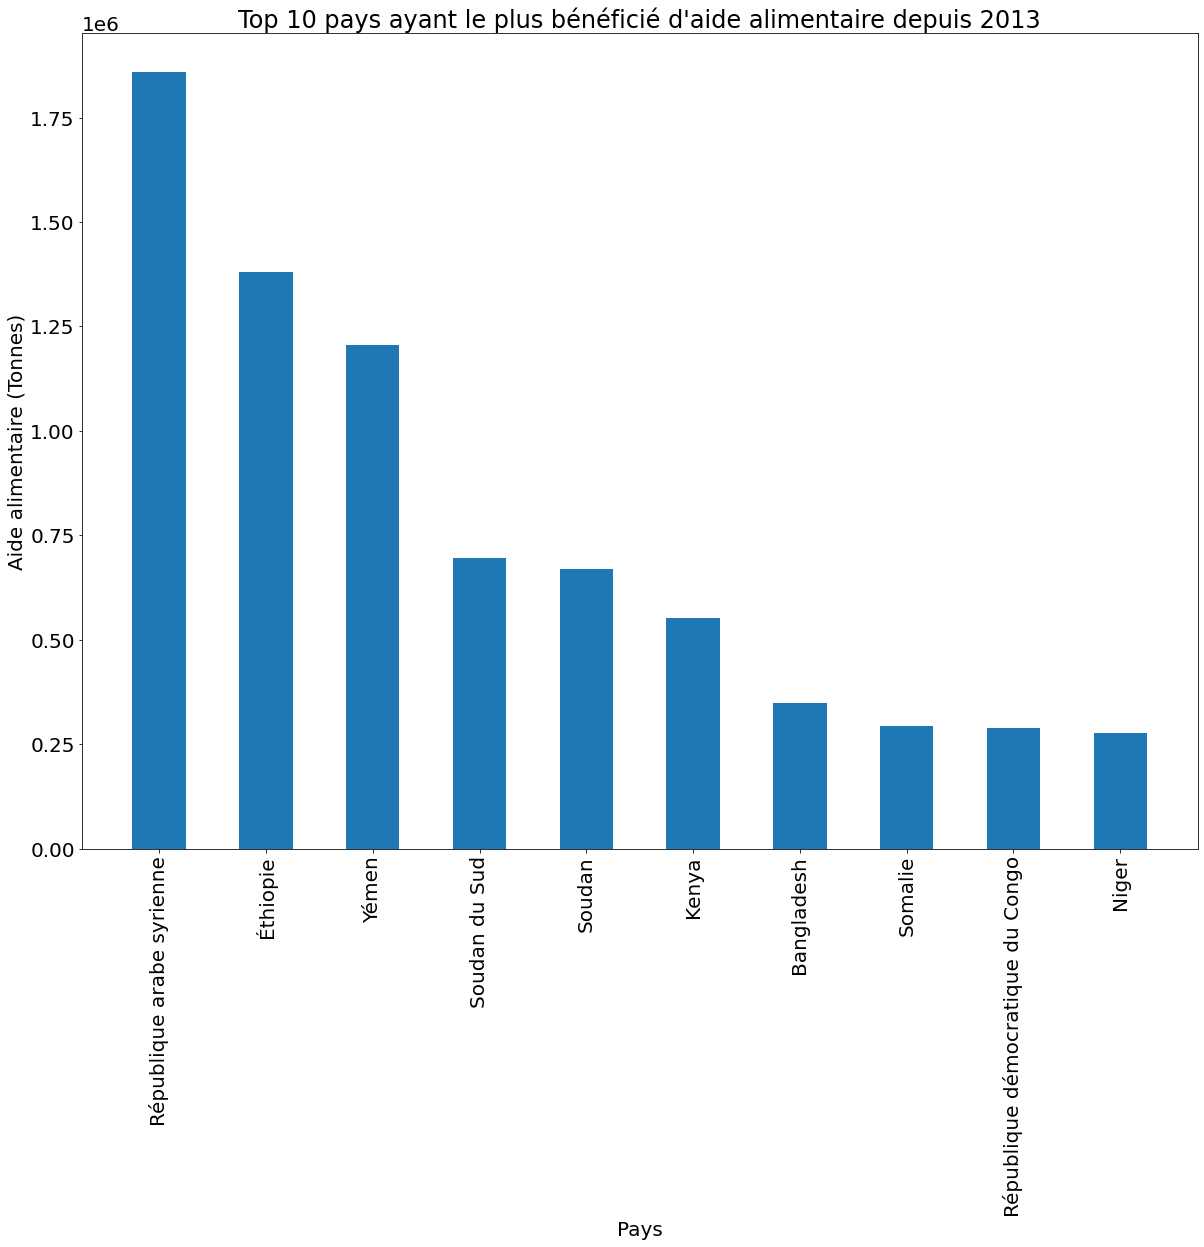

In [103]:
plt.figure(figsize=(20, 15))
plt.xticks(rotation=90)
plt.rcParams['axes.titlesize'] = 24
Pays = Top10AideAlimentaire2017.index
Aide = Top10AideAlimentaire2017['Valeur']
plt.bar(Pays, Aide, width=0.5)
plt.xlabel('Pays')
plt.ylabel('Aide alimentaire (Tonnes)')
plt.title('Top 10 pays ayant le plus bénéficié d\'aide alimentaire depuis 2013')
plt.show()